# **The Spark Foundation Data Science & Business Analytics Internship**
## Task One 

### **Problem Statement**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [88]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

## Loading Dataset

In [89]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Plotting the Data Points

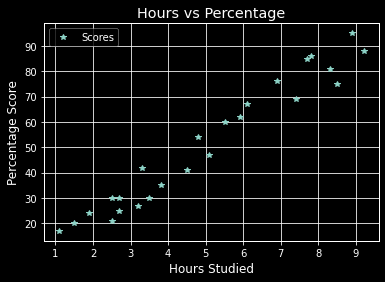

In [90]:
data.plot(x= 'Hours' , y = 'Scores',style = '*')
with plt.style.context('fast'):
    plt.title('Hours vs Percentage')  
    plt.xlabel('Hours Studied')  
    plt.ylabel('Percentage Score')

    plt.show()

## Preprocessing The Data

In [91]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values


### Splitting the Data

In [158]:
x_train,x_test,y_train,y_test = sk.model_selection.train_test_split(x,y,random_state = 58,test_size = 0.10)

## Training the Model

In [159]:
model = sk.linear_model.LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

## Coefficient of determination (𝑅²)

In [160]:
r_sq = model.score(x_train, y_train)
print(r_sq)

0.9508554253938527


## Plotting The Regression Line

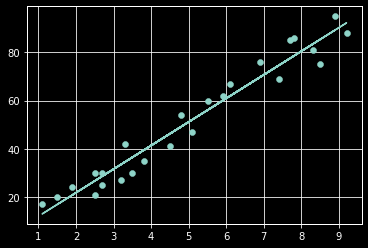

In [161]:
line = model.intercept_ + model.coef_*x
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## It's Time to make Predictions

In [162]:
prediction = model.predict(x_test)
print(prediction)

[61.9363496  83.45413456 59.98018733]


## Comparing the actual and predicted values

In [163]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})  
df 

,Actual,Predicted
0,67,61.936350
1,81,83.454135
2,62,59.980187


### Testing 

In [164]:
hours = np.array(9.25).reshape((-1,1))
pred = model.predict(hours)
print(f'No. of Hours = {hours[0][0]}')
print(f'Predicted Score = {pred[0]}')

No. of Hours = 9.25
Predicted Score = 92.74590533875798


## Calculating Error

In [165]:
print(f'Mean Absolute Error {sk.metrics.mean_absolute_error(y_test, prediction)}')

Mean Absolute Error 3.179199208103853
